<a href="https://www.kaggle.com/code/anannoasif/multiclass?scriptVersionId=155700521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [4]:
new_test = test_df

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [6]:
train_df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [7]:
train_df['Edema'].unique()

array(['N', 'Y', 'S'], dtype=object)

In [8]:
train_df['Drug'].unique()

array(['D-penicillamine', 'Placebo'], dtype=object)

In [9]:
c_cols = train_df.select_dtypes(include=['object', 'category']).columns



In [10]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of these columns
cat_data = train_df[c_cols].copy()

# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert categorical data to numerical labels
for col in cat_data.columns:
    cat_data[col] = encoder.fit_transform(cat_data[col])

# concatenating the numerical categorical columns with any numerical columns to include in the correlation matrix
num_data = train_df.select_dtypes(include=['int64', 'float64'])

# Concatenate numerical columns and converted categorical columns
combined_data = pd.concat([num_data, cat_data], axis=1)

# Calculate correlation matrix
correlation_matrix = combined_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                     id    N_Days       Age  Bilirubin  Cholesterol   Albumin  \
id             1.000000 -0.011638 -0.008351   0.007194    -0.011046 -0.019808   
N_Days        -0.011638  1.000000 -0.102354  -0.346434    -0.145811  0.255724   
Age           -0.008351 -0.102354  1.000000   0.099016    -0.053876 -0.114848   
Bilirubin      0.007194 -0.346434  0.099016   1.000000     0.302153 -0.303191   
Cholesterol   -0.011046 -0.145811 -0.053876   0.302153     1.000000 -0.091830   
Albumin       -0.019808  0.255724 -0.114848  -0.303191    -0.091830  1.000000   
Copper         0.008203 -0.284355  0.095199   0.442223     0.168266 -0.218479   
Alk_Phos      -0.004393 -0.030874  0.025879   0.131317     0.129131 -0.083582   
SGOT           0.020395 -0.240918 -0.020768   0.368653     0.326864 -0.200928   
Tryglicerides -0.006650 -0.186453  0.021767   0.315681     0.274044 -0.112304   
Platelets     -0.007707  0.147626 -0.094822  -0.081987     0.091455  0.141284   
Prothrombin    0.007979 -0.1

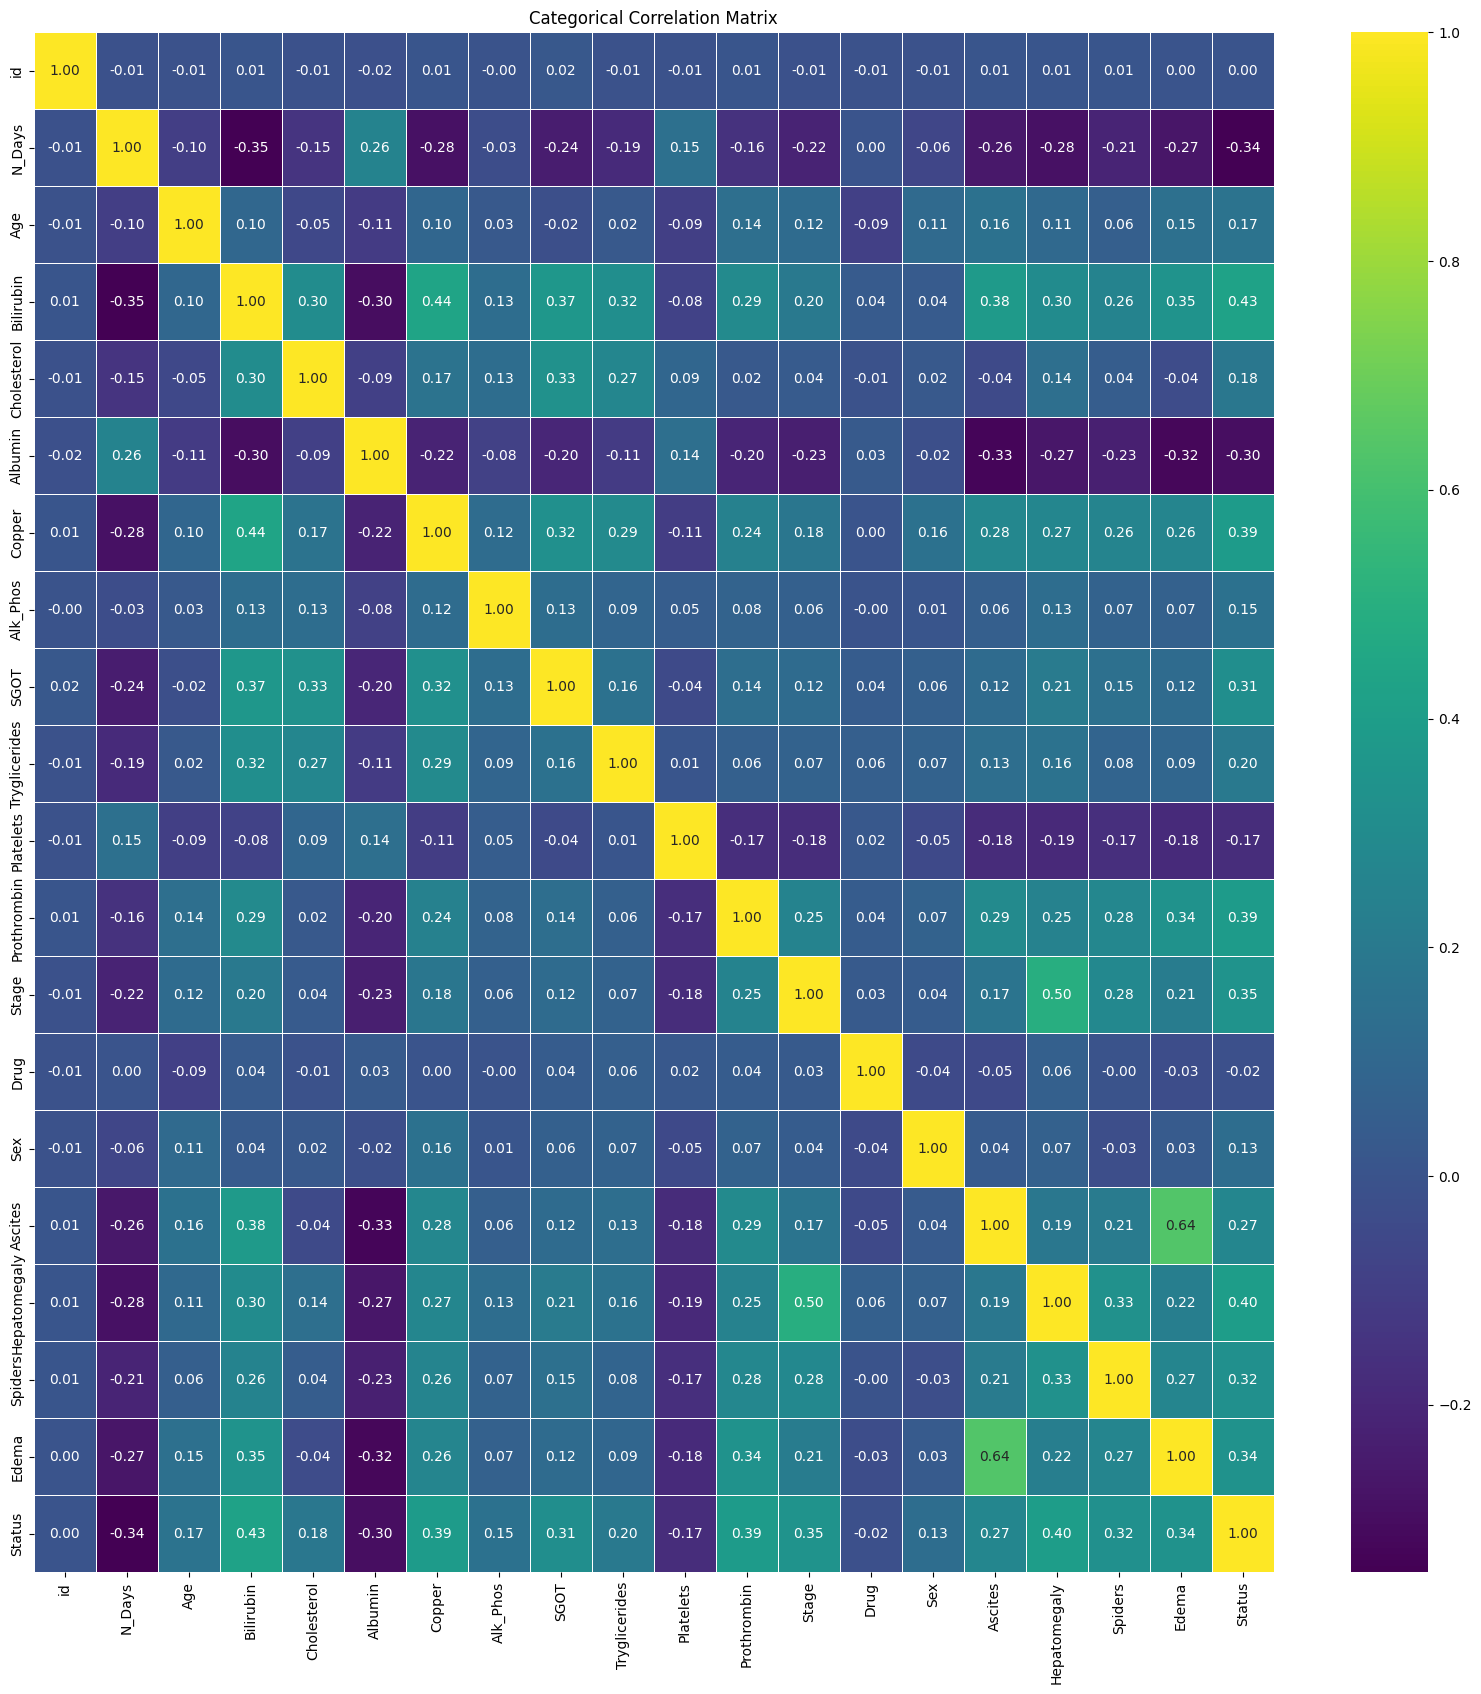

In [11]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Categorical Correlation Matrix')
plt.show()

In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00


In [13]:
sample_df = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
sample_df.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


In [14]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [17]:
df = pd.concat([train_df, test_df], axis=0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13176 entries, 0 to 5270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  object 
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  object 
 5   Ascites        13176 non-null  object 
 6   Hepatomegaly   13176 non-null  object 
 7   Spiders        13176 non-null  object 
 8   Edema          13176 non-null  object 
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage       

In [19]:
df['Drug']=encoder.fit_transform(df['Drug'])
df['Ascites']=encoder.fit_transform(df['Ascites'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Hepatomegaly']=encoder.fit_transform(df['Hepatomegaly'])
df['Spiders']=encoder.fit_transform(df['Spiders'])
df['Edema']=encoder.fit_transform(df['Edema'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13176 entries, 0 to 5270
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13176 non-null  int64  
 1   N_Days         13176 non-null  int64  
 2   Drug           13176 non-null  int64  
 3   Age            13176 non-null  int64  
 4   Sex            13176 non-null  int64  
 5   Ascites        13176 non-null  int64  
 6   Hepatomegaly   13176 non-null  int64  
 7   Spiders        13176 non-null  int64  
 8   Edema          13176 non-null  int64  
 9   Bilirubin      13176 non-null  float64
 10  Cholesterol    13176 non-null  float64
 11  Albumin        13176 non-null  float64
 12  Copper         13176 non-null  float64
 13  Alk_Phos       13176 non-null  float64
 14  SGOT           13176 non-null  float64
 15  Tryglicerides  13176 non-null  float64
 16  Platelets      13176 non-null  float64
 17  Prothrombin    13176 non-null  float64
 18  Stage       

In [21]:
#df = df.drop('id', axis=1)

In [22]:
df_test = df[df['Status'].isnull()]
df_train = df[~df['Status'].isnull()]

(array([ 400., 1216., 1767., 3162., 3278., 1918.,  481.,  664.,  168.,
         122.]),
 array([ 62. , 112.1, 162.2, 212.3, 262.4, 312.5, 362.6, 412.7, 462.8,
        512.9, 563. ]),
 <BarContainer object of 10 artists>)

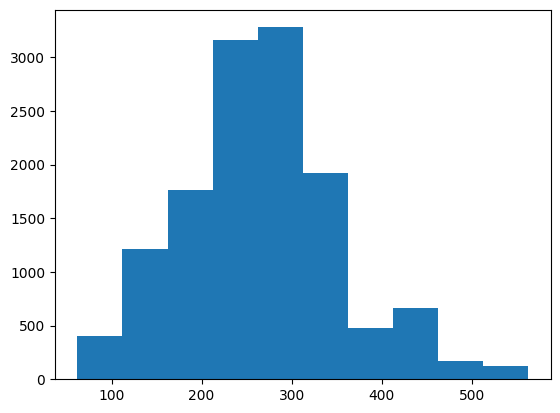

In [23]:
matplotlib.pyplot.hist(df['Platelets'])

In [24]:
# sns.pairplot(df_train)

In [25]:
df_train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema              int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

<Axes: xlabel='Drug', ylabel='Cholesterol'>

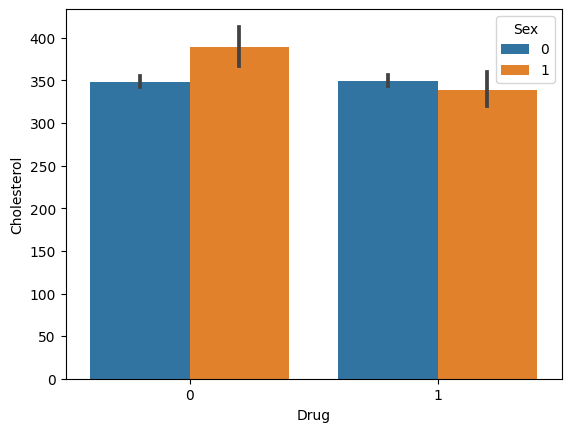

In [26]:
sns.barplot(x='Drug', y='Cholesterol', hue = 'Sex', data=df_train)

<Axes: xlabel='Drug', ylabel='Prothrombin'>

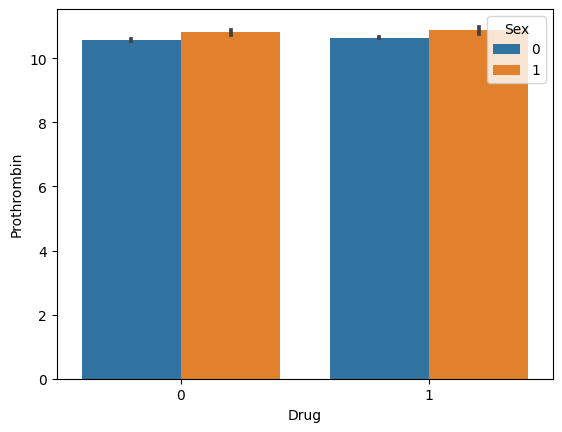

In [27]:
sns.barplot(x='Drug', y='Prothrombin', hue = 'Sex', data=df_train)

<Axes: xlabel='Drug', ylabel='Albumin'>

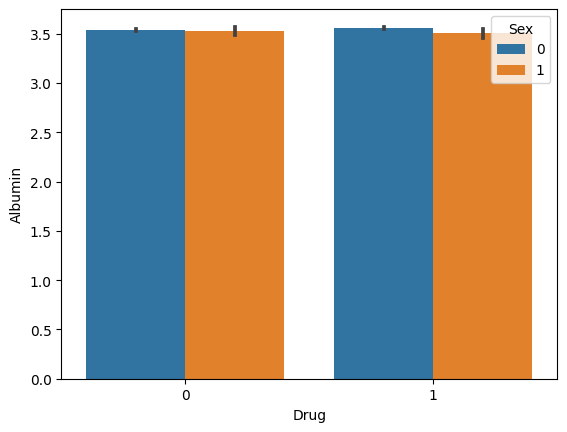

In [28]:
sns.barplot(x='Drug', y='Albumin', hue = 'Sex', data=df_train)

<Axes: xlabel='Drug', ylabel='Copper'>

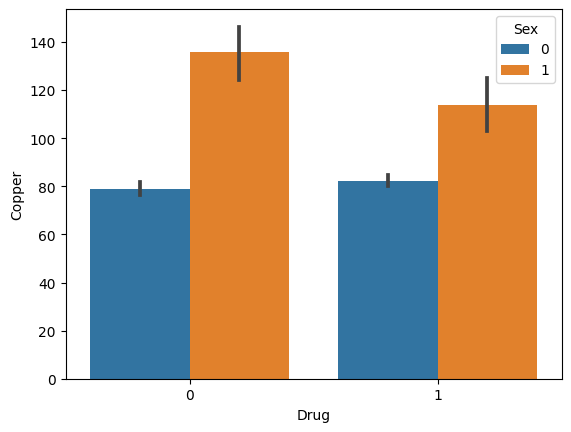

In [29]:
sns.barplot(x='Drug', y='Copper', hue = 'Sex', data=df_train)

<Axes: xlabel='Drug', ylabel='Alk_Phos'>

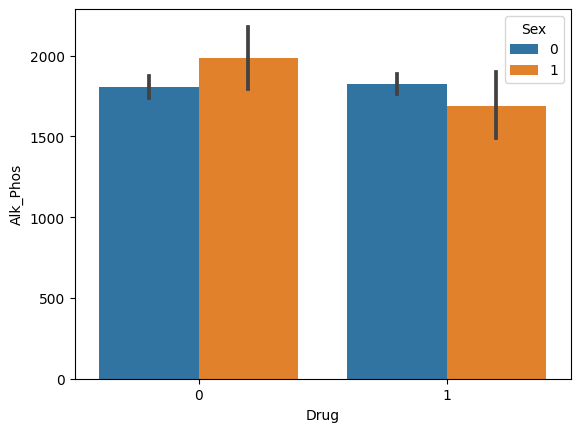

In [30]:
sns.barplot(x='Drug', y='Alk_Phos', hue = 'Sex', data=df_train)

<Axes: xlabel='Drug', ylabel='Platelets'>

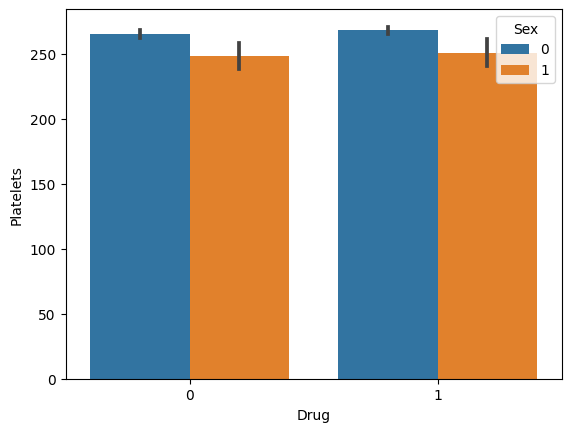

In [31]:
sns.barplot(x='Drug', y='Platelets', hue = 'Sex', data=df_train)

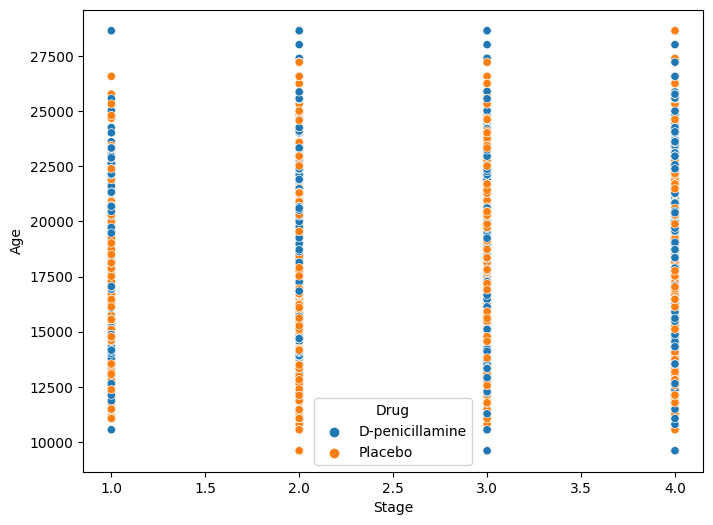

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stage', y='Age', hue = 'Drug', data=train_df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram')

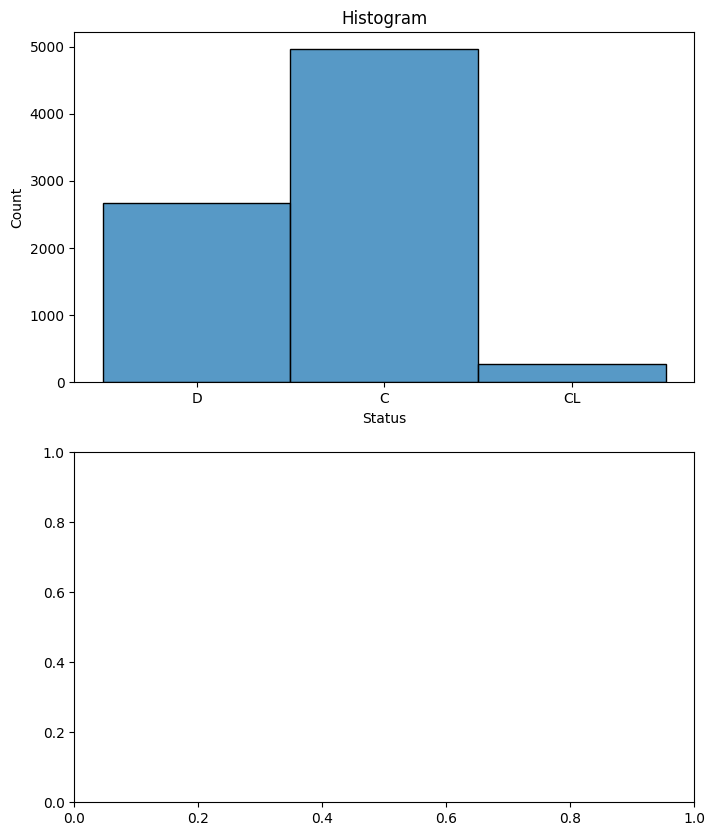

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


sns.histplot(data=df_train, x='Status', ax=axes[0])
axes[0].set_title('Histogram')

# sns.boxplot(data=df_train, x='Status', ax=axes[1])
# axes[1].set_title('Boxplot')

# plt.tight_layout()
# plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


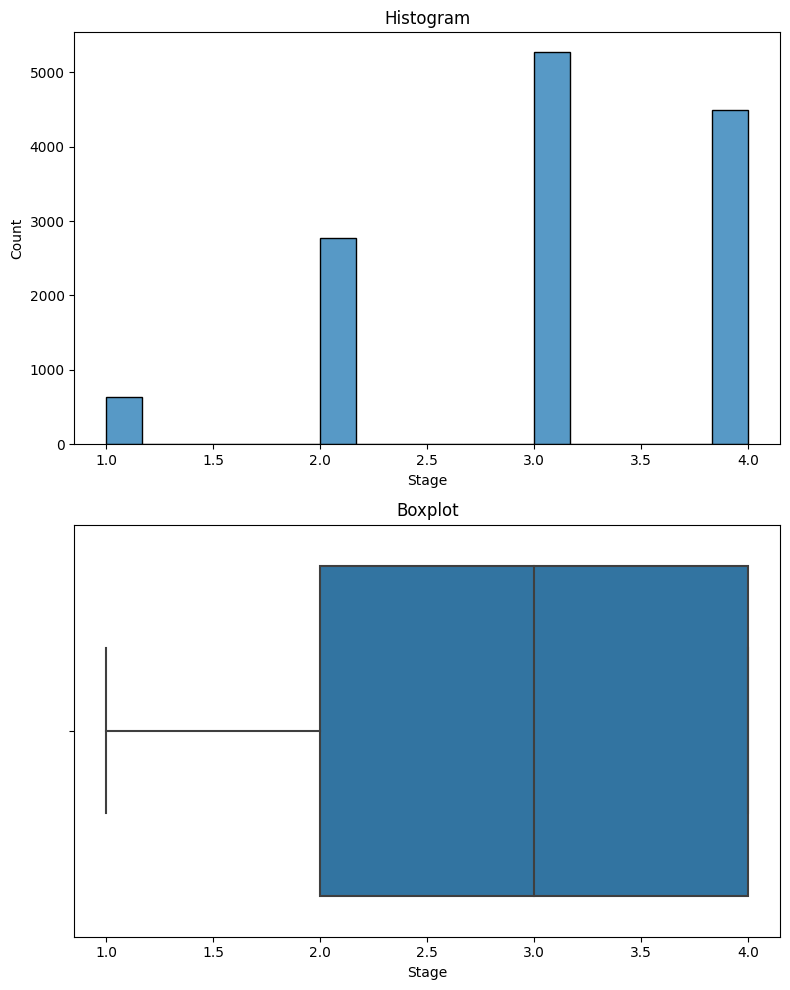

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


sns.histplot(data=df, x='Stage', ax=axes[0])
axes[0].set_title('Histogram')

sns.boxplot(data=df, x='Stage', ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


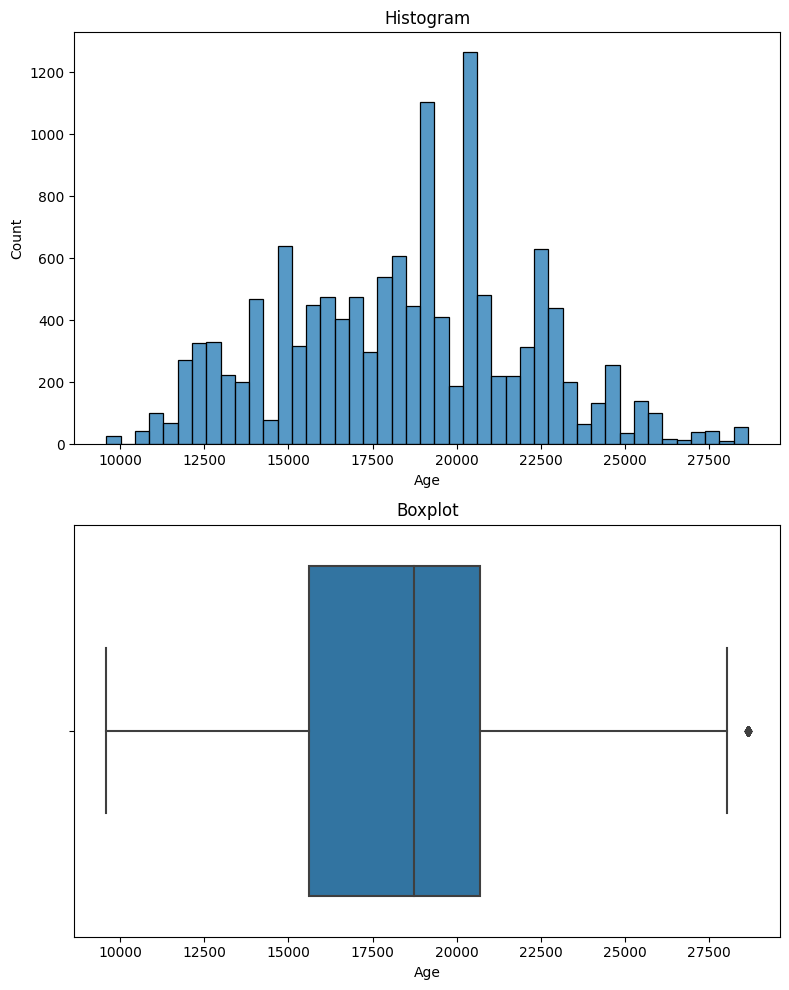

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


sns.histplot(data=df, x='Age', ax=axes[0])
axes[0].set_title('Histogram')

sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()


<Axes: xlabel='Status', ylabel='Stage'>

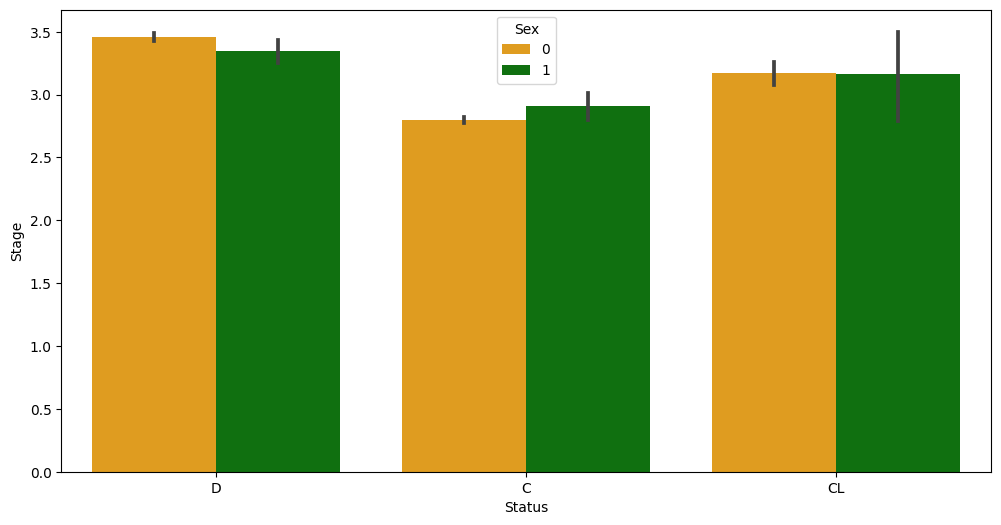

In [36]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= 'Status', y = 'Stage', hue= 'Sex', data = df_train, palette = ['orange','green'])

<Axes: xlabel='Spiders', ylabel='count'>

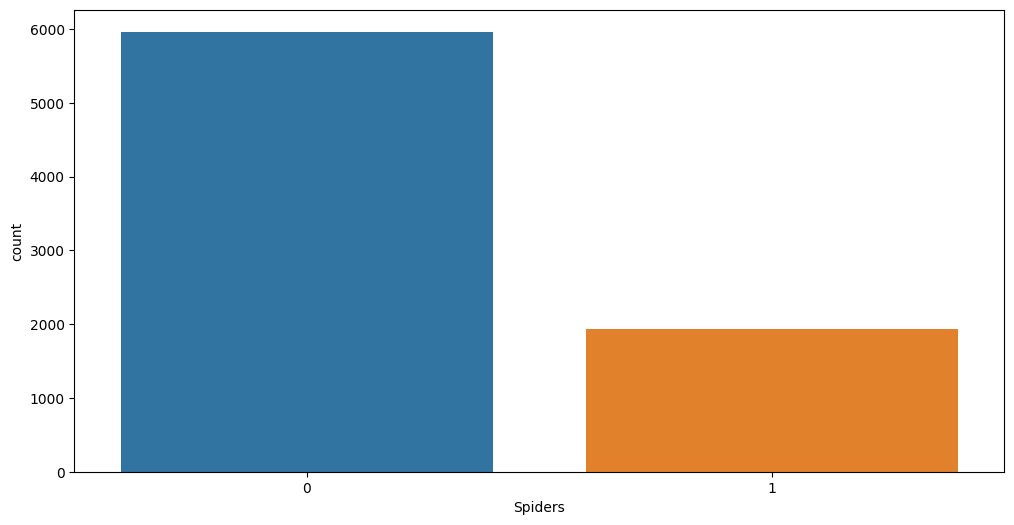

In [37]:
sns.countplot(x='Spiders',data=df_train)


<Axes: xlabel='Edema', ylabel='count'>

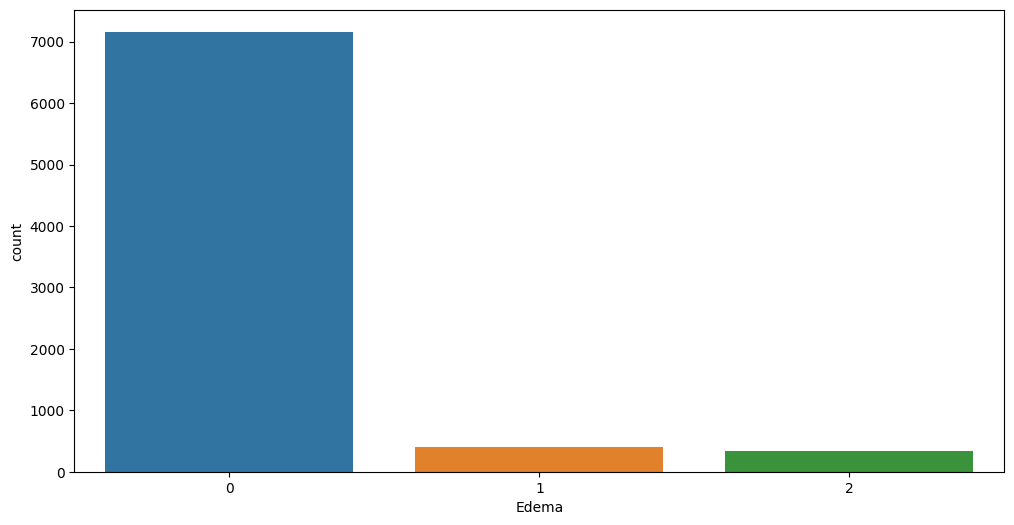

In [38]:
sns.countplot(x='Edema',data=df_train)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


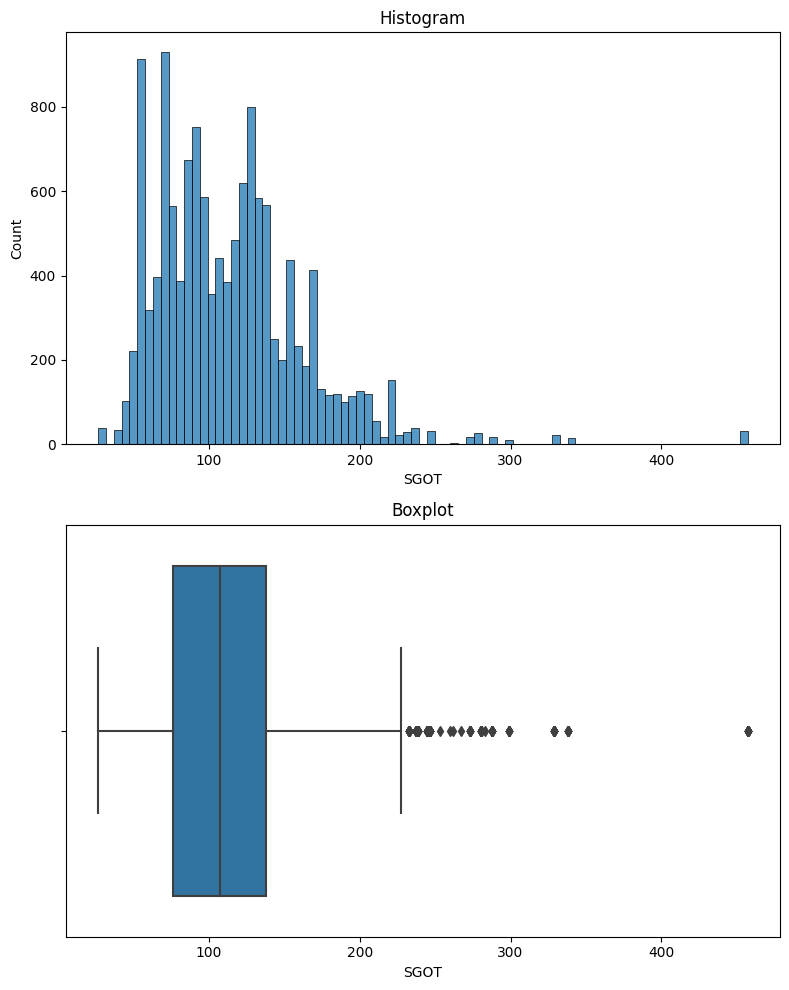

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))


sns.histplot(data=df, x='SGOT', ax=axes[0])
axes[0].set_title('Histogram')

sns.boxplot(data=df, x='SGOT', ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()


In [40]:
### Building a model

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Make device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [41]:
X = df_train.drop(['Status'],axis=1)
y = df_train['Status']

In [42]:
X.shape

(7905, 19)

In [43]:
X.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [44]:
df_test.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [45]:
df_test['Status'].isna().sum()

5271

In [46]:
df_test = df_test.drop(['Status'], axis=1)

In [47]:
# Standardize features
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [49]:
print(np.array(y_train))

['C' 'C' 'C' ... 'C' 'C' 'D']


In [50]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming y_train_np and y_test_np are your target label arrays
y_train_np_encoded = label_encoder.fit_transform(y_train)
y_test_np_encoded = label_encoder.transform(y_test)

In [51]:
# Convert data to NumPy arrays
X_train_np = X_train.astype('float64')
y_train_np_encoded = y_train_np_encoded.astype('int64')
X_test_np = X_test.astype('float64')
y_test_np_encoded = y_test_np_encoded.astype('int64')

In [52]:
# Convert data to NumPy arrays
X_train_np = np.array(X_train).astype(np.float64)
y_train_np = np.array(y_train_np_encoded).astype(np.int64)
X_test_np = np.array(X_test).astype(np.float64)
y_test_np = np.array(y_test_np_encoded).astype(np.int64)

In [53]:
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_np)
y_train_tensor = torch.LongTensor(y_train_np)
X_test_tensor = torch.FloatTensor(X_test_np)
y_test_tensor = torch.LongTensor(y_test_np)
# X_t_tensor = torch.FloatTensor(X_t_np)

In [54]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()

        self.fc1 = nn.Linear(in_features=input_size, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=512)
        self.fc3 = nn.Linear(in_features=512, out_features=256)
        self.fc4 = nn.Linear(in_features=256, out_features=128)
        self.output = nn.Linear(in_features=128, out_features=num_classes)

        self.batch_norm1 = nn.BatchNorm1d(256)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.batch_norm4 = nn.BatchNorm1d(128)

        self.dropout = nn.Dropout(0.95)
        self.max_pool = nn.MaxPool1d(kernel_size=2)

    def forward(self, x):
        z = F.silu(self.batch_norm1(self.fc1(x)))
        z = self.dropout(z)
        
        z = F.silu(self.batch_norm2(self.fc2(z)))
        z = self.dropout(z)
        
        z = F.silu(self.batch_norm3(self.fc3(z)))
        z = self.dropout(z)
        
        z = F.silu(self.batch_norm4(self.fc4(z)))
        z = self.dropout(z)
        
        z = torch.flatten(z, start_dim=1)
        
        output = F.softmax(self.output(z), dim=1)
        return output


In [55]:
# Initialize the model
input_size = X_train.shape[1]
num_classes = 3
model = NN(input_size, num_classes)

# Define loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00009, weight_decay=0.3)  # Learning rate set to 0.0001


Epoch [1/100], Train Loss: 1.1189713206644076, Test Loss: 1.110647201538086, Accuracy: 62.99810246679317%
Epoch [11/100], Train Loss: 0.7554663628584821, Test Loss: 0.7484261989593506, Accuracy: 80.01265022137888%
Epoch [21/100], Train Loss: 0.7446770414681769, Test Loss: 0.7438241243362427, Accuracy: 80.45540796963947%
Epoch [31/100], Train Loss: 0.7423024994900225, Test Loss: 0.7428129315376282, Accuracy: 80.51865907653384%
Epoch [41/100], Train Loss: 0.7406159831631568, Test Loss: 0.741763710975647, Accuracy: 80.70841239721696%
Epoch [51/100], Train Loss: 0.7393720015779769, Test Loss: 0.7410989999771118, Accuracy: 80.83491461100569%
Epoch [61/100], Train Loss: 0.7385267882615535, Test Loss: 0.7406732439994812, Accuracy: 80.96141682479443%
Epoch [71/100], Train Loss: 0.7378972679056147, Test Loss: 0.7405619621276855, Accuracy: 81.02466793168881%
Epoch [81/100], Train Loss: 0.7373724770953126, Test Loss: 0.7406575679779053, Accuracy: 81.08791903858318%
Epoch [91/100], Train Loss: 0.7

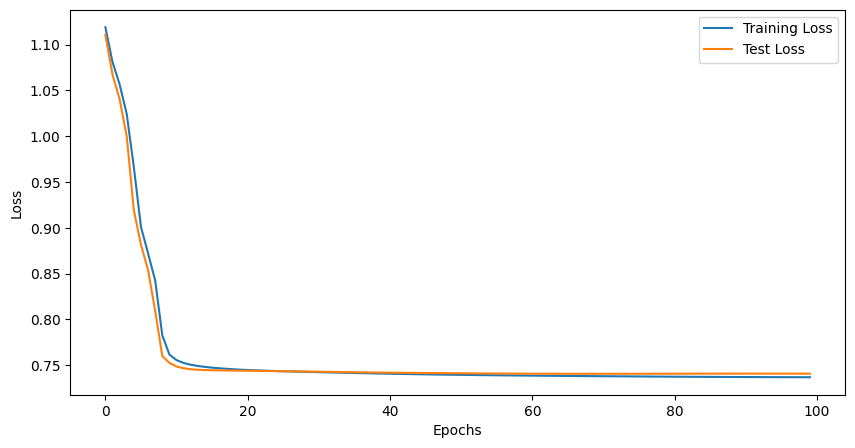

In [56]:
# Lists to store training and validation losses
train_losses = []  # To store training losses
test_losses = []   # To store validation losses
accuracies = []    # To store accuracies

seed_value = 42

# Set seed for PyTorch
torch.manual_seed(seed_value)

# Training the model
epochs = 100        # Number of epochs for training
batch_size = 32     # Size of each batch


for epoch in range(epochs):
    running_loss = 0.0  # Tracks the cumulative loss within an epoch
    for i in range(0, len(X_train_tensor), batch_size):
        optimizer.zero_grad()             # Zero the gradients
        outputs = model(X_train_tensor[i:i+batch_size])  # Get predictions for the batch
        loss = criterion(outputs, y_train_tensor[i:i+batch_size])  # Calculate loss for the batch
        loss.backward()                  # Backpropagation
        optimizer.step()                 # Optimizer step (update weights)
        running_loss += loss.item()      # Accumulate loss for this batch

    # Calculate and store training loss
    train_loss = running_loss / (len(X_train_tensor) / batch_size)  # Calculate average training loss per batch
    train_losses.append(train_loss)                                 # Store the training loss

    # Calculate validation loss
    test_loss = criterion(model(X_test_tensor), y_test_tensor).item()  # Calculate validation loss
    test_losses.append(test_loss)                                     # Store validation loss

    with torch.no_grad():
        model.eval()                            # Set the model to evaluation mode
        outputs = model(X_test_tensor)          # Get predictions for the test data
        predicted = torch.max(outputs, 1)[1]    # Get the predicted classes
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)  # Calculate accuracy
        accuracies.append(accuracy)             # Store accuracy

    # Print and plot losses
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss}, Test Loss: {test_loss}, Accuracy: {accuracy * 100}%')

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
torch.save(model.state_dict(), 'model.pth')

In [58]:
Xt = df_test
Xt.tail()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5266,13171,2870,1,12279,0,0,0,0,0,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,1,24803,0,0,0,0,0,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,0,16990,0,0,1,0,0,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,1,11773,0,0,0,0,0,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0
5270,13175,2272,0,21600,0,0,0,0,0,2.0,232.0,3.42,18.0,1636.0,170.50,83.0,213.0,13.6,2.0


In [59]:
scaler = MinMaxScaler()

X_t = scaler.fit_transform(Xt)

In [60]:
X_t_np =  np.array(X_t)
X_t_tensor = torch.FloatTensor(X_t_np)

In [61]:
new_input_size = X_t.shape[1]
new_num_classes = 3

# Assuming you have your trained model and the test data in tensor format

# Load your trained model (replace 'model.pth' with your actual model file)
model = NN(input_size=new_input_size, num_classes=new_num_classes)
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode

# Get the predictions from the model
with torch.no_grad():
    outputs = model(X_t_tensor)
    predicted_probs = F.softmax(outputs, dim=1).detach().numpy()  # Detach and convert to numpy array

# Create a DataFrame with the predictions
prediction_df = pd.DataFrame({
    'id': df_test['id'],
    'Status_C': predicted_probs[:, 0],
    'Status_CL': predicted_probs[:, 1],
    'Status_D': predicted_probs[:, 2]
})

# Normalize probabilities per row before saving
sums = prediction_df[['Status_C', 'Status_CL', 'Status_D']].sum(axis=1)
prediction_df['Status_C'] /= sums
prediction_df['Status_CL'] /= sums
prediction_df['Status_D'] /= sums

# Save the DataFrame to a CSV file
prediction_df.to_csv('predictions.csv', index=False)